In [1]:
import climetlab as cml
import climetlab_cems_flood as cems
import warnings
warnings.filterwarnings("ignore")

In [2]:
gl_historical = cml.load_dataset(
            'cems-flood-glofas-historical',
            model='lisflood',
            product_type='consolidated',
            system_version='version_3_1',
            period='*0101',
            variable="river_discharge_in_the_last_24_hours"
        )

By downloading data from this dataset, you agree to the terms and conditions defined at https://github.com/ecmwf-lab/climetlab_cems_flood/LICENSEIf you do not agree with such terms, do not download the data. 


In [3]:
gl_historical

Home page,-
Documentation,-
Citation,-
Licence,-
Request,"system_version: version_3_1 hydrological_model: lisflood product_type: consolidated variable: river_discharge_in_the_last_24_hours hyear: ['1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'] hmonth: ['january'] hday: ['01'] format: grib"


In [11]:
ds = gl_historical.to_xarray().drop("surface")

In [12]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 1500, longitude: 3600, time: 43)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2021-01-01
  * latitude   (latitude) float64 89.95 89.85 89.75 ... -59.75 -59.85 -59.95
  * longitude  (longitude) float64 -179.9 -179.8 -179.8 ... 179.7 179.8 179.9
Data variables:
    dis24      (time, latitude, longitude) float32 dask.array<chunksize=(43, 1500, 3600), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-09-07T14:59 GRIB to CDM+CF via cfgrib-0.9.9...

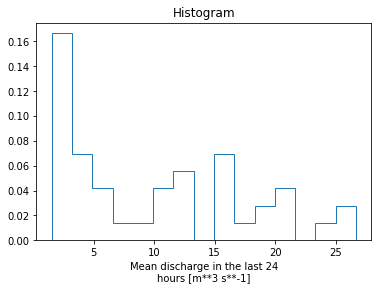

In [13]:
_=ds.dis24.sel(latitude=47,longitude=-1.6,method='nearest').plot.hist(bins=15,density=True,histtype="step")

In [14]:
cml.plot_map(gl_historical)

NotImplementedError: climetlab_cems_flood.glofas_historical.GlofasHistorical.plot_map()

In [7]:
# gl_forecast = cml.load_dataset(
#             'cems-flood-glofas-forecast',
#             model='htessel_lisflood',
#             product_type='control_forecast',
#             system_version='version_2_1',
#             period='2020*01',
#             leadtime='24-72',
#             variable="river_discharge_in_the_last_24_hours"
#         )


# style = """
#     <style>table.climetlab td {
#     vertical-align: top;
#     text-align: left !important;}
# </style>"""


# class D:
    
#     def _repr_html_(self):
#         return style

# class S(D):
#     a = 10
#     d = "-"
    


#     def _repr_html_(self):
        
        
#         ret = super()._repr_html_()
#         li = ""
#         for key in gl_forecast.request:
#             li += f"<li> <b>{key}: </b> {gl_forecast.request[key]} </li>".format()
            
#         return ret + f"""<table class="climetlab"><tr><td><b>Request</b></td><td><ul>{li}</ul></td></tr></table>"""